In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
import math
from math import exp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
import statsmodels.graphics.mosaicplot as mp
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Intro

Binary classification.

$\hat{y} = f(\sum_{i}\beta_i*x_i\in[-\infty...+\infty]) = category$

How to transform $[-\infty...+\infty]$ into $\{cat1, cat2\}$ ?

**Logistic Regression** suggests to solve this problem by predicting the probability of one of the classes.

$\hat{y} = p(success)\in[0...1] = f(\sum_{i}\beta_i*x_i\in[-\infty...+\infty])$

in other words, we need to find such a f-inv(p(success)) that:

$f^{-1}(p(success))\in[-\infty...+\infty] = \sum_{i}\beta_i*x_i\in[-\infty...+\infty]$

and define p(success) from it

**Logit transformation**

$odds = \frac{p(success)}{p(fail)} \text{ - a function of p(success) } \in [0...\infty]$

$0 < odds < 1 => p(success) < p(fail)$  
$odds > 1 => p(success) > p(fail)$

Then we can take $log(odds)$:

$log(odds) = log(\frac{p(success)}{p(fail)}) \in [-\infty...+\infty]$

$log(odds) < 0 => p(success) < p(fail)$  
$log(odds) > 0 => p(success) > p(fail)$

And **there it is**

$logit(p) = log(odds) = log(\frac{p(success)}{p(fail)}) = \sum_{i}\beta_i*x_i$

$odds = \frac{p(success)}{p(fail)} = exp^{\sum_{i}\beta_i*x_i}$

$p(success) = \frac{exp(\sum_{i}\beta_i*x_i)}{1 + exp(\sum_{i}\beta_i*x_i)}$

## Dataset

In [3]:
data = pd.read_csv('datasets/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Intercept only model

In [4]:
X = np.ones((data.shape[0])).reshape(-1,1)
y = data['Survived']

In [5]:
# sklearn Logistic Regression
model = LogisticRegression()
model.fit(X, y)

intercept = model.intercept_
print(f'Intercept: {intercept}')
odds = exp(intercept)
print(f'odds: {odds}')

# Same results manually
odds2 = len(data[data['Survived'] == 1]) / len(data[data['Survived'] == 0])
print(f'odds2: {odds2}')

# Statsmodels
glm_binom2 = smf.glm(formula="Survived ~ 1",
                     data=data, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()

Intercept: [-0.47332458]
odds: 0.6229278456474563
odds2: 0.6229508196721312


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Thu, 18 Apr 2024   Deviance:                       1186.7
Time:                        17:15:36   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

We could use chi-squared test instead of intercept-only model. Chi-squared test would give the result: distribution of survived / not survived is significantly different from uniform.  
Intercept-only Logistic Regression says:

$Intercept = -0.4733$  
$log(odds) = \sum{\beta_i * x_i} = Intercept * 1$  
$odds = exp(Intercept * 1) = exp(-0.4733) = 0.6229$

**Result:**  
odds of survival is 0.6229... with confidence interval = [a...b]. And the probability (P-value) that H0 is true ($Intercept = 0$) is 0.000...

## Model with one predictor

In [6]:
X = data[['Sex']]
y = data['Survived']

OHE = OneHotEncoder(drop='first')
X = pd.DataFrame(data=OHE.fit_transform(X).toarray(),
                columns=OHE.get_feature_names_out())

X[:5]

,Sex_male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [7]:
model = LogisticRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coef}')

odds_int = exp(intercept)
print(f'Odds of intercept: {odds_int}')

odds_coef1 = exp(coef)
print(f'Odds of coefficient 1: {odds_coef1}')

# Statsmodels
glm_binom2 = smf.glm(formula="Survived ~ Sex",
                     data=data, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()

Intercept: [1.01628767]
Coefficients: [[-2.44597988]]
Odds of intercept: 2.7629188423646522
Odds of coefficient 1: 0.08664119511592742


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Thu, 18 Apr 2024   Deviance:                       917.80
Time:                        17:15:36   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
Sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
===============================================================================
"""

As with Linear Regression, the meaning of the intercept is: what is the value of $\hat{y}$ when all other X are zeros? But in Logistic Regression, when we do OHE, **one of each categories is dropped**, meaning that for categorical variables **intercept contains log(odds) for all dropped categories**. In this case, the category 'Sex = woman' is dropped. And it is equal to 'Sex = man = 0'. So, log(odds) for women is:

$log(odds) = Intercept + coef_1 * x_1$  
Where $x_1$ is being a man

For women:  
$log(odds) = Intercept + coef_1 * 0$  
$log(odds) = Intercept = log(odds_{women})$

For men:  
$log(odds) = Intercept + coef_1 * 1$  
$log(odds) = log(odds_{women}) + log(\frac{odds_{men}}{odds_{women}}) * 1$  
$odds = exp^{log(odds_{women}) + log(\frac{odds_{men}}{odds_{women}})} = exp^{log(odds_{women})}*exp^{log(\frac{odds_{men}}{odds_{women}})} = odds_{women} * \frac{odds_{men}}{odds_{women}} = odds_{men}$

$Intercept = log(odds_{women})$  
$coef_1 = log(\frac{odds_{men}}{odds_{women}})$

## Model with Two predictors

In [8]:
# data
X = data[['Sex', 'Pclass']]
y = data['Survived']

OHE = OneHotEncoder(drop='first')
X = pd.DataFrame(data=OHE.fit_transform(X).toarray(),
                columns=OHE.get_feature_names_out())

# sklearn Logistic Regression
model = LogisticRegression()
model.fit(X, y)

intercept = model.intercept_
coef = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coef}')

odds_int = exp(intercept)
print(f'Odds of intercept: {odds_int}')

odds_coef1 = exp(coef[0][0])
odds_coef2 = exp(coef[0][1])
odds_coef3 = exp(coef[0][2])
print(f'Odds of coefficient 1: {odds_coef1}')
print(f'Odds of coefficient 2: {odds_coef2}')
print(f'Odds of coefficient 3: {odds_coef3}')

# Statsmodels
X = data[['Sex', 'Pclass']]
y = data['Survived']

OHE = OneHotEncoder(drop='first')
X = pd.DataFrame(data=OHE.fit_transform(X).toarray(),
                columns=OHE.get_feature_names_out())
X['Intercept'] = [1] * data.shape[0]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Intercept: [2.14801461]
Coefficients: [[-2.53597208 -0.73187332 -1.7791967 ]]
Odds of intercept: 8.567830985528484
Odds of coefficient 1: 0.07918470797599535
Odds of coefficient 2: 0.4810070635050484
Odds of coefficient 3: 0.16877366938019908
Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.3032
Time:                        17:15:36   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.145e-77
                 coef  

**Formula**
$log(odds) = Intercept_{sex-female+pclass-1} + coef_1 * X_{sex-male} + coef_2 * X_{pclass-2} + coef_3 * X_{pclass-3}$

**Intercept** = $log(odds_{women-First})$  
**coef-1** = $log(\frac{odds_{men-First}}{odds_{women-First}})$  
**coef-2** = $log(\frac{odds_{women-Second}}{odds_{women-First}})$  
**coef-3** = $log(\frac{odds_{women-Third}}{odds_{women-First}})$  

For example, odds of a **man from Second class:**

$log(odds) = Intercept + coef_1 + coef_2$  
$log(odds) = log(odds_{women-First}) + log(\frac{odds_{men-First}}{odds_{women-First}}) + log(\frac{odds_{women-Second}}{odds_{women-First}})$  
$log(odds) = log(\frac{odds_{men-First} * odds_{women-Second}}{odds_{women-First}})$

But what are the odds of men in First VS men in Second classes?

To investigate the intersection of classes we can add new columns:
```
coef-4: X['Sex_male * Pclass_2'] = X['Sex_male'] * X['Pclass_2']
coef-5: X['Sex_male * Pclass_3'] = X['Sex_male'] * X['Pclass_3']
```
**coef-4** = $log(\frac{odds_{men-Second}}{odds_{women-Second}} / \frac{odds_{men-First}}{odds_{women-First}}) = log(\frac{odds_{men-Second}}{odds_{women-Second}}) - coef_{1-old}$

**coef-5** = $log(\frac{odds_{men-Third}}{odds_{women-Third}} / \frac{odds_{men-First}}{odds_{women-First}}) = log(\frac{odds_{men-Third}}{odds_{women-Third}}) - coef_{1-old}$

In [9]:
# Statsmodels
X = data[['Sex', 'Pclass']]
y = data['Survived']

OHE = OneHotEncoder(drop='first')
X = pd.DataFrame(data=OHE.fit_transform(X).toarray(),
                columns=OHE.get_feature_names_out())
X['Sex_male * Pclass_2'] = X['Sex_male'] * X['Pclass_2']
X['Sex_male * Pclass_3'] = X['Sex_male'] * X['Pclass_3']
X['Intercept'] = [1] * data.shape[0]

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447866
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.3274
Time:                        17:15:36   Log-Likelihood:                -399.05
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.670e-82
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Sex_male               -3.9494      0.616     -6.411      0.000      -5.157      -2.742
Pc

**Formula**
$$
log(odds) = Intercept_{sex-female+pclass-1} + coef_1 * X_{sex-male} + coef_2 * X_{pclass-2} \\
+coef_3 * X_{pclass-3} + coef_4 * X_{Sex-male * Pclass-2} + coef_5 * X_{Sex-male * Pclass-3}
$$

Similarly, odds of a **man from Second class:**  
$log(odds) = Intercept + coef_1 + coef_2 + coef_4$  
$log(odds) = log(odds_{women-First}) + log(\frac{odds_{men-First}}{odds_{women-First}}) + log(\frac{odds_{women-Second}}{odds_{women-First}}) + log(\frac{odds_{men-Second}}{odds_{women-Second}} / \frac{odds_{men-First}}{odds_{women-First}})$  
After cancelling out we have:  
$log(odds) = log(odds_{men-Second}))$



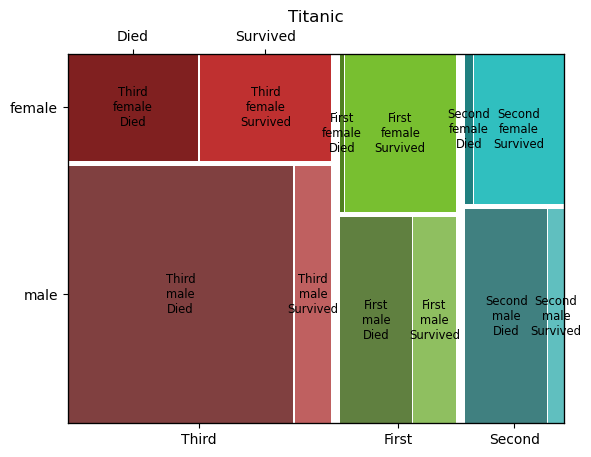

In [10]:
plot_data = data[['Survived', 'Pclass', 'Sex']]
plot_data['Survived'] = np.where(plot_data['Survived'] == 1, 'Survived', 'Died')
plot_data['Pclass'] = np.where(
    plot_data['Pclass'] == 1, 'First',
    np.where(plot_data['Pclass'] == 2, 'Second', 'Third'))

mp.mosaic(plot_data, ['Pclass', 'Sex', 'Survived'],
          gap=0.02, title='Titanic', properties={'color':'gray'})

plt.show()